In [21]:
from runs import Run, Snapshot, get_runs_in_dir
import tabulate
import os
from IPython.display import Markdown as md
from IPython.display import HTML

import matplotlib.pyplot as plt
import matplotlib
import shutil
import jinja2
from tqdm.notebook import trange, tqdm

# Build an archive of the various runs & snapshots

This notebook can be used to generate a printable html archive, of all runs and their snapshots.

template in [templates/runs.j2](./templates/runs.j2), style in [templates/style.css](./templates/style.css)

## Configuration

In [2]:

outdir = os.path.abspath('out/html')

## Output Run Index

In [3]:
#see also https://github.com/matplotlib/matplotlib/blob/f6e0ee49c598f59c6e6cf4eefe473e4dc634a58a/lib/matplotlib/_cm.py#L859
palette = matplotlib.cm.datad['Accent']['listed']
palette = matplotlib.cm.datad['Set3']['listed']

In [4]:
def get_rgb_for_idx(i):
    return f"rgb({palette[i%len(palette)][0]*255}, {palette[i%len(palette)][1]*255},{palette[i%len(palette)][2]*255})"

In [5]:
%run ThisPlaceDoesExist.ipynb

Create a plot of the Fréchet inception distance metric for all runs. Use 'cumulative iteration'. That is, if the run picks up from an existing network -- e.g. when the resuming a stopped run -- it plots the line as a continuation.

>The Inception Score (IS) is an algorithm used to assess the quality of images created by a generative image model such as a generative adversarial network (GAN). The score is calculated based on the output of a separate, pretrained Inceptionv3 image classification model applied to a sample of (typically around 30,000) images generated by the generative model. The Inception Score is maximized when the following conditions are true:

> 1. The entropy of the distribution of labels predicted by the Inceptionv3 model for the generated images is minimized. In other words, the classification model confidently predicts a single label for each image. Intuitively, this corresponds to the desideratum of generated images being "sharp" or "distinct".
> 2. The predictions of the classification model are evenly distributed across all possible labels. This corresponds to the desideratum that the output of the generative model is "diverse".

> It has been somewhat superseded by the related Fréchet inception distance. While the Inception Score only evaluates the distribution of generated images, the FID compares the distribution of generated images with the distribution of a set of real images ("ground truth"). 

([Wikipedia](https://en.wikipedia.org/wiki/Inception_score))

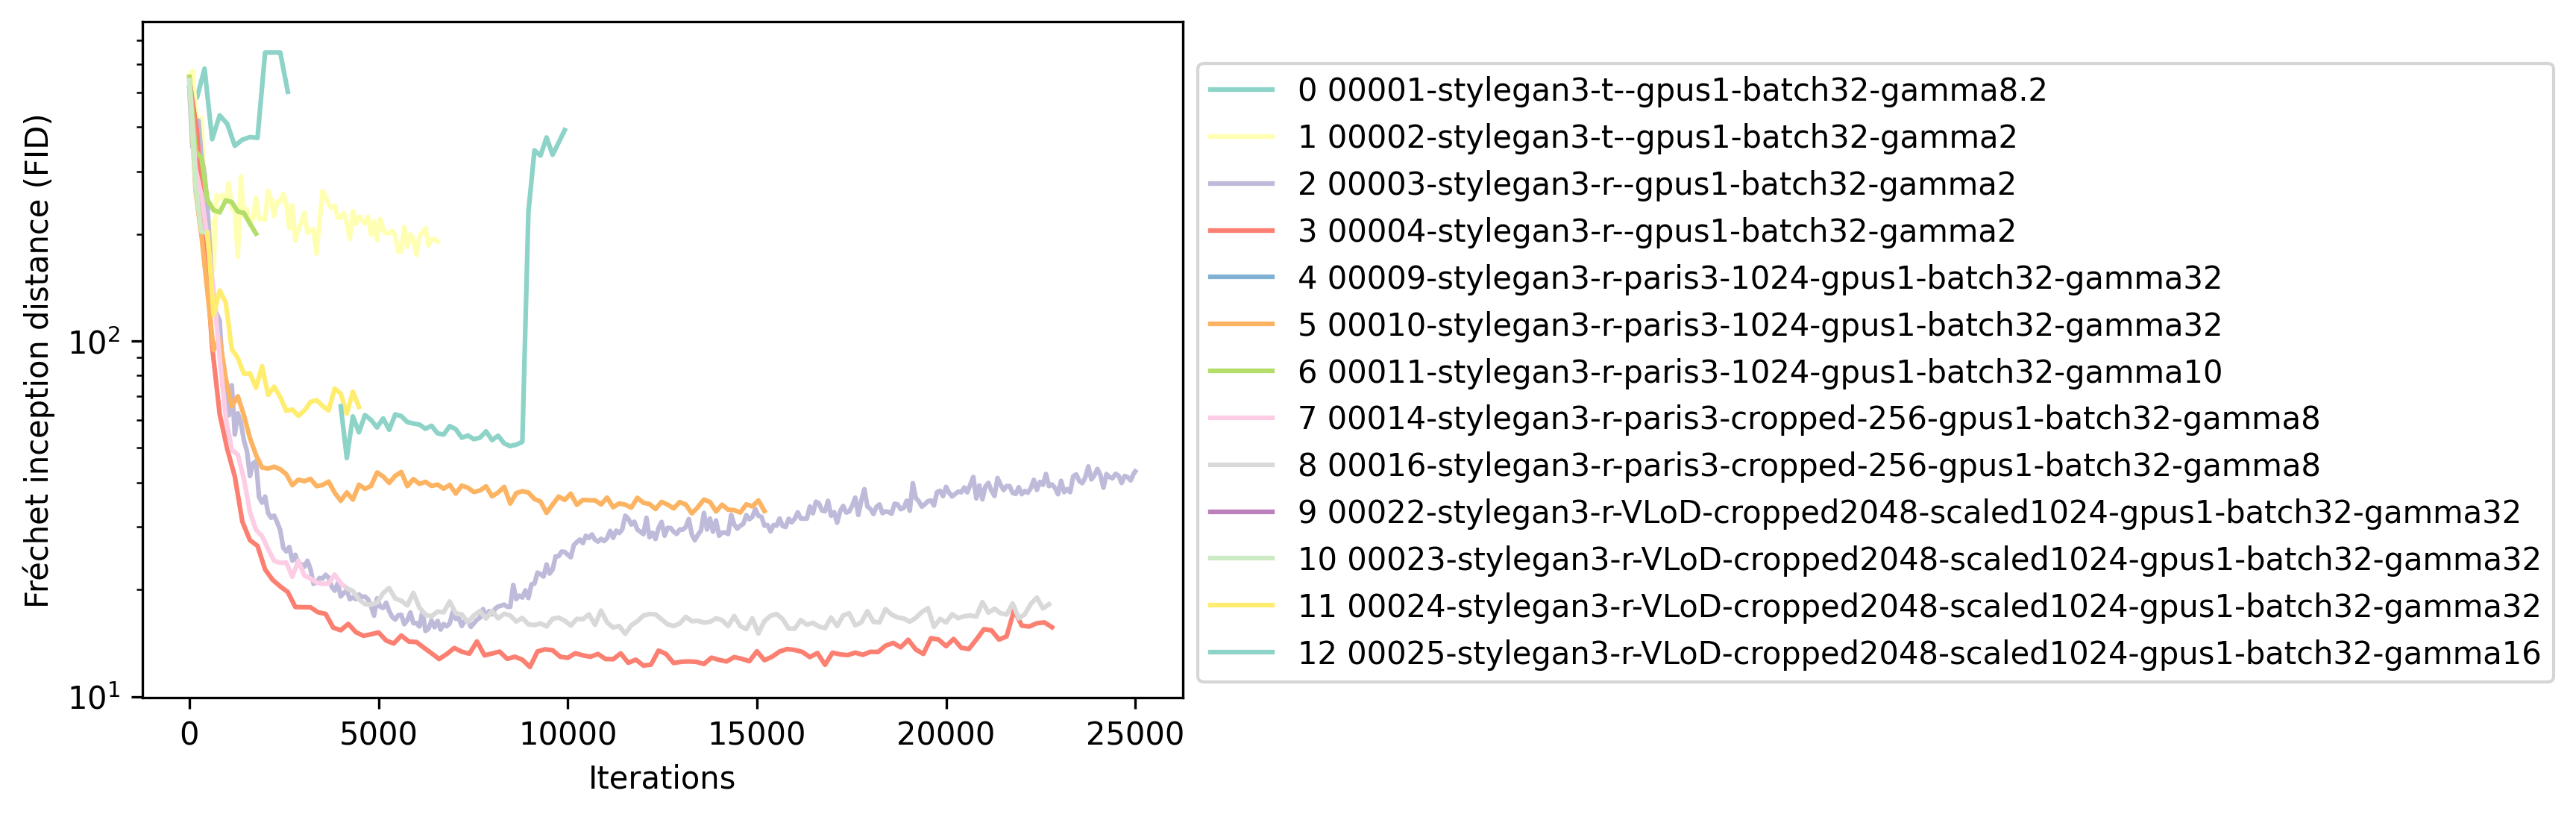

In [7]:
%matplotlib inline

plot = plot_runs(runs, dpi=300, palette=palette)
plot.legend(bbox_to_anchor=(1,0), loc="lower left")
# plot.show()

plt.xlabel('Iterations')
plt.ylabel('Fréchet inception distance (FID)')
plt.savefig(os.path.join(outdir, 'runs.png'), bbox_inches='tight', transparent=True)

Create plots of the loss for both the StyleGAN discriminator (D) and generator (G).

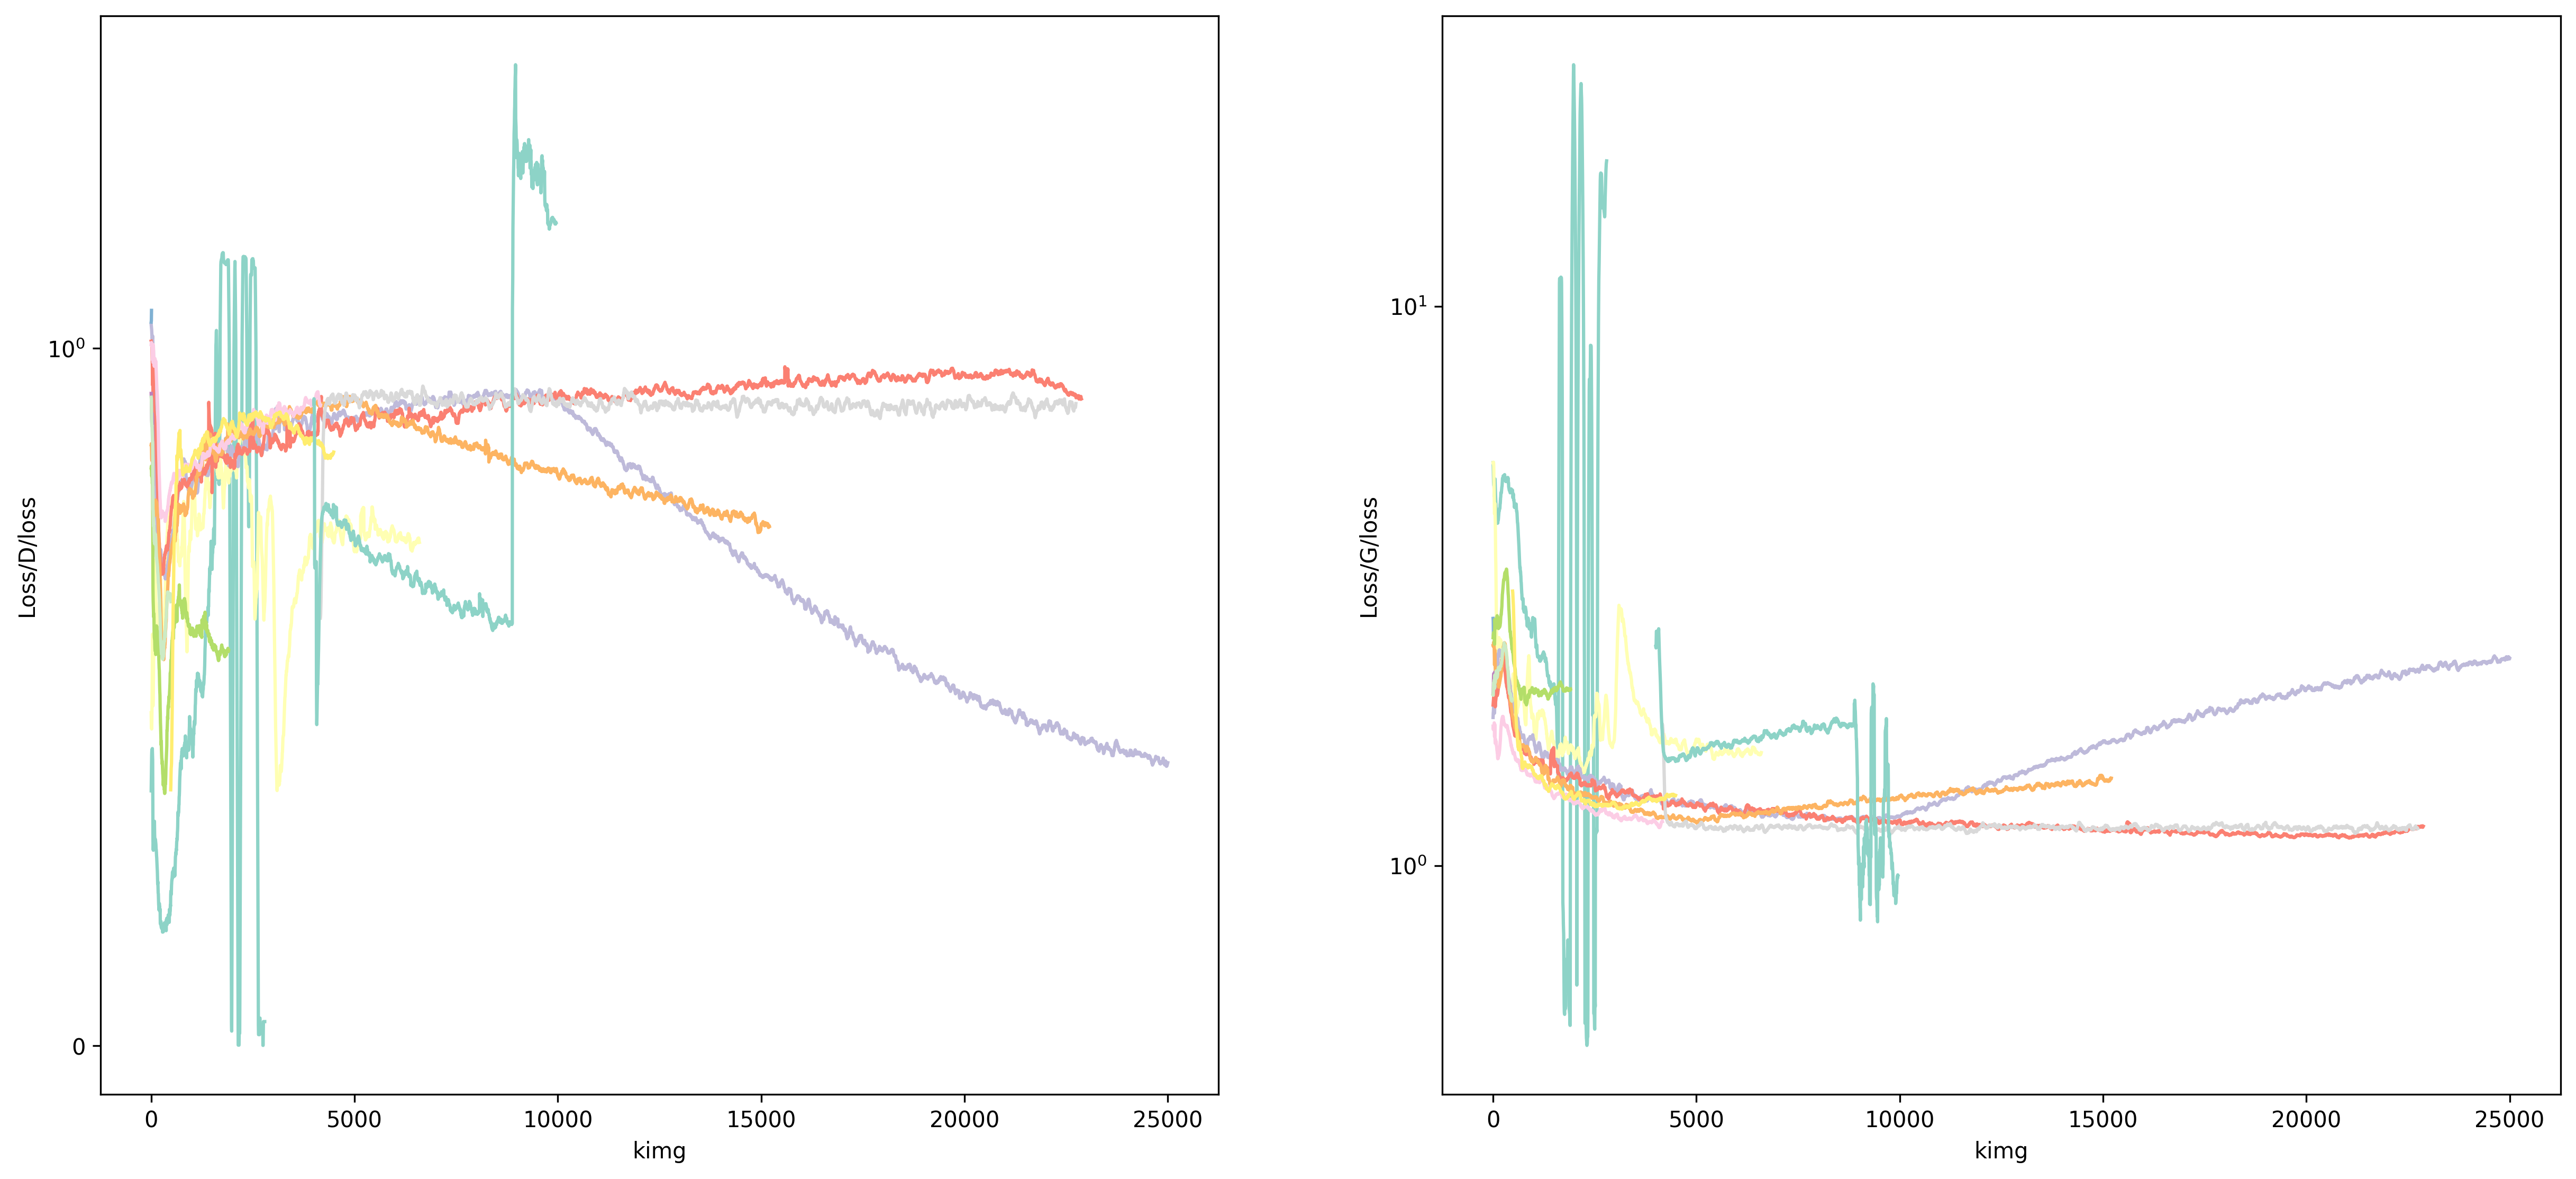

In [8]:
plot = plot_stats([
    'Loss/D/loss',
    'Loss/G/loss',
], runs, palette=palette)
# plot.legend()
plt.savefig(os.path.join(outdir, 'run_losses.png'), bbox_inches='tight', transparent=True)

In [9]:
index_html = tabulate.tabulate([
        {
         #   "idx": i,
         # "conditional": run.dataset_is_conditional(),
         **run.get_summary(),
         "nr": f"<a href='#run{run.as_nr}'>{run.as_nr}</a>",
            
         "page": f"<span class='tocitem' style='color:{get_rgb_for_idx(i)}' data-ref='#run{run.as_nr}'>&#129926;</span>",
            
        } for i, run in enumerate(runs)
    ], tablefmt='unsafehtml', headers="keys", colalign=("left","left")
)

In [10]:
index_html

'<table>\n<thead>\n<tr><th>nr                           </th><th>dataset                    </th><th>conditional  </th><th style="text-align: right;">  resolution</th><th style="text-align: right;">  gamma</th><th>duration         </th><th style="text-align: right;">  iterations</th><th style="text-align: right;">  last_fid</th><th>page                                                                                             </th></tr>\n</thead>\n<tbody>\n<tr><td><a href=\'#run00001\'>00001</a></td><td>paris3                     </td><td>True         </td><td style="text-align: right;">         256</td><td style="text-align: right;">    8.2</td><td>3 days, 10:34:26 </td><td style="text-align: right;">        2600</td><td style="text-align: right;">  502.277 </td><td><span class=\'tocitem\' style=\'color:rgb(141.0, 211.0,199.0)\' data-ref=\'#run00001\'>&#129926;</span></td></tr>\n<tr><td><a href=\'#run00002\'>00002</a></td><td>paris3                     </td><td>True         </td><td style="text-align: right;">         256</td><td style="text-align: right;">    2  </td><td>5 days, 3:43:08  </td><td style="text-align: right;">        6560</td><td style="text-align: right;">  190.346 </td><td><span class=\'tocitem\' style=\'color:rgb(255.0, 255.0,179.0)\' data-ref=\'#run00002\'>&#129926;</span></td></tr>\n<tr><td><a href=\'#run00003\'>00003</a></td><td>paris3                     </td><td>True         </td><td style="text-align: right;">         256</td><td style="text-align: right;">    2  </td><td>18 days, 13:01:50</td><td style="text-align: right;">       25000</td><td style="text-align: right;">   42.9661</td><td><span class=\'tocitem\' style=\'color:rgb(190.0, 186.0,218.0)\' data-ref=\'#run00003\'>&#129926;</span></td></tr>\n<tr><td><a href=\'#run00004\'>00004</a></td><td>paris3                     </td><td>False        </td><td style="text-align: right;">         256</td><td style="text-align: right;">    2  </td><td>15 days, 16:13:20</td><td style="text-align: right;">       22800</td><td style="text-align: right;">   15.6691</td><td><span class=\'tocitem\' style=\'color:rgb(251.0, 128.0,114.0)\' data-ref=\'#run00004\'>&#129926;</span></td></tr>\n<tr><td><a href=\'#run00009\'>00009</a></td><td>paris3-1024.zip            </td><td>False        </td><td style="text-align: right;">        1024</td><td style="text-align: right;">   32  </td><td>0:00:00          </td><td style="text-align: right;">           0</td><td style="text-align: right;">  549.99  </td><td><span class=\'tocitem\' style=\'color:rgb(128.0, 177.0,211.0)\' data-ref=\'#run00009\'>&#129926;</span></td></tr>\n<tr><td><a href=\'#run00010\'>00010</a></td><td>paris3-1024.zip            </td><td>False        </td><td style="text-align: right;">        1024</td><td style="text-align: right;">   32  </td><td>50 days, 3:15:24 </td><td style="text-align: right;">       15200</td><td style="text-align: right;">   33.2466</td><td><span class=\'tocitem\' style=\'color:rgb(253.0, 180.0,98.0)\' data-ref=\'#run00010\'>&#129926;</span> </td></tr>\n<tr><td><a href=\'#run00011\'>00011</a></td><td>paris3-1024.zip            </td><td>False        </td><td style="text-align: right;">        1024</td><td style="text-align: right;">   10  </td><td>5 days, 18:48:04 </td><td style="text-align: right;">        1760</td><td style="text-align: right;">  200.356 </td><td><span class=\'tocitem\' style=\'color:rgb(179.0, 222.0,105.0)\' data-ref=\'#run00011\'>&#129926;</span></td></tr>\n<tr><td><a href=\'#run00014\'>00014</a></td><td>paris3-cropped-256         </td><td>False        </td><td style="text-align: right;">         256</td><td style="text-align: right;">    8  </td><td>2 days, 20:08:22 </td><td style="text-align: right;">        4160</td><td style="text-align: right;">   20.1699</td><td><span class=\'tocitem\' style=\'color:rgb(252.0, 205.0,229.0)\' data-ref=\'#run00014\'>&#129926;</span></td></tr>\n<tr><td><a href=\'#run00016\'>00016</a></td><td>paris3-cropped-256         </td><t

The pages are generated in HTML using the jinja2 templating library. 

In [42]:
jinja_env = jinja2.Environment(
    loader=jinja2.FileSystemLoader("templates"),
    autoescape=jinja2.select_autoescape()
)



In [43]:
template = jinja_env.get_template("runs.j2")


In [56]:
introduction = """
<h2>Introduction</h2>
<p>This document is part of <em>This Place Does Exist</em>. In this project a StyleGAN3 network was trained on a series of just over 3000 photos of shopfronts in Paris. This document provides an overview of all networks that were trained, including their intermediary snapshots. For every snapshot of the network a series of preview images is provided.</p>

<p>Some of our observations:</p>

<ul>
<li>
Right of the start it proved important to pick the right network. For example run 00002 contained rotated images because it used the <em>stylegan3-t</em> (translation equivalent) instead of <em>stylegan3-r</em> (translation and rotation equivalent) configuration.
</li><li>
The first runs were trained using a conditional dataset, in which the arrondissement was encoded. However, we got the impression that the training without an arrondissement condition lead to more diverse images.
</li>
<li>
On some occasions a 'mode collapse' occurs, which means that the generator start producing only a limited variety of images. This effect is particularly visible in run 00001 and 00025 in which the generated images suddenly become indistinguishable blurbs. 
However, in some extend this is also visible in other networks, which shift from rather saturated images to generating images in which have more washed out sepia colours. This can be seen quite clearly in run 00002, 00004, or 00010.
This most likely occurs due to the dominance of Paris' Haussmannian architecture that frames the shop fronts, and which is visible in a large number of the training images.
</li>
<li>
In order to overcome this, we tried cropping the images to about 70% of their original size. For a large part this removed the Haussmannian limestone from the images, indeed leading to generated images that were richer in colour. 
</li><li>
When generating larger images, 1024x1024 pixels instead of 256x256, different training parameters were needed. Over the course of the project we were unable to have the large images match the quality of the smaller images.
</li>
</ul>

<p>In order to make sense of the first graph in this document, which shows the FID, or Fréchet Inception distance, it might be good to have a sense of what this metric means:</p>
<figure>
<blockquote>
    <p>The Inception Score (IS) is an algorithm used to assess the quality of images created by a generative image model such as a generative adversarial network (GAN). The score is calculated based on the output of a separate, pretrained Inceptionv3 image classification model applied to a sample of (typically around 30,000) images generated by the generative model. The Inception Score is maximized when the following conditions are true:</p>
    <ol>
    <li>The entropy of the distribution of labels predicted by the Inceptionv3 model for the generated images is minimized. In other words, the classification model confidently predicts a single label for each image. Intuitively, this corresponds to the desideratum of generated images being "sharp" or "distinct".</li>
    <li>The predictions of the classification model are evenly distributed across all possible labels. This corresponds to the desideratum that the output of the generative model is "diverse".</li>
    </ol>

    <p>It has been somewhat superseded by the related Fréchet inception distance. While the Inception Score only evaluates the distribution of generated images, the FID compares the distribution of generated images with the distribution of a set of real images ("ground truth"). </p>
</blockquote>
<figcaption>(from: <a href="https://en.wikipedia.org/wiki/Inception_score">Wikipedia, Inception Score</a>)</figcaption>
</figure>
"""
HTML(introduction)

In [57]:
template_vars = {
    "runs_graph": "runs.png",
    "runs_losses_graph": "run_losses.png",
    "runs_table": index_html,
    "runs": runs,
    "introduction": introduction,
}

In [58]:
with open(os.path.join(outdir, 'index.html'), 'w') as fp:
    fp.write(template.render(**template_vars))

Copy necessary auxilary files to the output directory:

In [59]:
files = [
    "templates/style.css", 
    "templates/pagedjs-interface.css",
]
for src in files:
    shutil.copy(src, outdir)

All network snaphots also have a some preview images stored. Crop these into smaller preview images and save these to the output folder.

In [60]:
for run in runs:
    nr = 7 if run.resolution > 512 else 8
    for snapshot in tqdm(run.snapshots):
        filename = os.path.join(outdir, 'imgs', snapshot.id + ".jpg")
        if not os.path.exists(filename):
            img = snapshot.get_preview_img(nr,1)
            img.save(filename)

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/314 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

Run the python http server to serve the document and images. These can now be opened with any browser. In my experience however is that the pdfs produced by Chromium are of a much, much smaller filesize than those produced by Firefox -- which unfortunately sometimes even crashes on producing the >100 page PDF.

In [ ]:
!cd out/html && python -m http.server